# Statistical Techniques for Data Analysis - Main CA 
Google Colab Link of the Project File: 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1eTbeSIoqP07qEqcalkfI_gaXDGzVIiEq?usp=sharing)

Names of Students: <br/>
**Ahmet Emin Tek** <br/>
**Liudmila Stolbetskaia**


# Car Price Prediction
In this project, we will apply Exploratory Data Analysis to describe features and apply some statistical techniques. Also, we will perform a Linear Regression model in order to predict a variable from our data. <br/>

We choose the [Car Price Prediction Data](https://www.kaggle.com/code/ahmetcalis/car-price-prediction/data) from Kaggle to work on this project. Here are the steps that we are going to perform: <br/>





---



📌 Exploring the data and applying descriptive statistics methods. 

```bash
* Brief information about the data. 

* Apply some python codes to describe the data. 

* Picking one qualitative and one quantitative variable describing them by using the convenience statistical methods.

* Applying data visualization in order to get better understanding about the dispersion of these two variables selected before. 
* Providing a description about the distribution of variables based on the descriptive statistics and visualizations that we applied before. 

* Checking the missing values. 

* Examining the outliers.  
```

📌 Hypothesis Test. 

```bash
* Choosing one variable from the data and performing a Hypothesis Test by supporting all the steps with appropriate references, statistical concepts and conclusions. 

* Interpreting the results, prowiding our own analysis and a conclusion based on our Hypothesis Test.

```

📌 Correlation Analysis

```bash
* Applying a correlation analysis between 2 variables. 

* Interpreting the results and checking if the correlation implies causation. 

* Providing a conclusion based on the findings.  
```

📌 Linear Regression Model

```bash
* Building linear regression models for prediction. 

* Interpreting the results and providing a conclusion based on the findings. 
```


## 1- Exploring the Data and Applying the Descriptive Statistics Methods


### 1.1 About Data

We have [Car Prices Dataset](https://www.kaggle.com/code/ahmetcalis/car-price-prediction/data) which is obtained from machinehack.com and served via kaggle.com in the "csv" file format.  <br/>

Dataset has 19237 rows and 18 columns. The **"Price"** column is a target column for the regression analysis.   <br/>

Datset contains following features: 

- ID: Unique identity number of each observation. 
- Price: Price of the car. 
- Levy: Tax of importing and exporting the cars.
- Manufacturer: Name of the manufacturer brand name.
- Model: Model of the car
- Prod. year: Production year of the car. 
- Category: Physical type of the car.
- Leather interior: Whether the car has leather interior or not. 
- Fuel type: Fuel type of the car.
- Engine volume: Engine volume of the car. 
- Mileage: Milage of the car in km. 
- Cylinders: Shows the number of cylinders of the car. 
- Gear box type: Type of the gear box of the car.
- Drive wheels: Indicates the driving wheel of the car. 
- Doors: Number of doors of the car.
- Wheel: Indicates the side of the wheel. 
- Color: Color of the car
- Airbags: Number of airbags in the car.  



### 1.2 Examining Data

In [ ]:
#reach to the Google drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


First of all, we will import required python libraries

In [ ]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

%matplotlib inline  

import warnings
warnings.filterwarnings("ignore") #this is for avoiding undesired warnings from the outputs 

We will read the csv data through Pandas's `read_csv()` function and assign our data to the variable called "df". <br/> 
Then, we will display the first 5 rows with `head()` function to get general insight about data. 



In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CCT Classes/Stats_CA/car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

By using `info()` function, we displayed some information about our data. <br/>

First we see that we have **18 columns** and **19237 rows**. <br/>

Also, we can see the type of columns from the output. We have **4 integer** type, **13 object** type, and **1 float** type columns. <br/>




In [ ]:
object_columns= []

for i in df.columns:
  if str(df[f"{i}"].dtype)=='object':
    object_columns.append(i)


df_u= pd.DataFrame() #new dataframe containing object columns

for i in object_columns:
  df_u[f"{i}"]= df[f"{i}"]

df_u.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver


Checking object type values if there is any inappropriate type.

In [ ]:
print("Unique Values:\n")
for i in range(len(df_u.nunique())):
        print("- ", df_u.nunique().index[i], ": ", sorted(df_u.iloc[:, i].unique()), sep='')

Unique Values:

- Levy: ['-', '1011', '1016', '1017', '1018', '1024', '1028', '1030', '1031', '1032', '1036', '1039', '1045', '1047', '1051', '1053', '1054', '1055', '1058', '1062', '1064', '1076', '1077', '1079', '1080', '1083', '1086', '1090', '1091', '1094', '1095', '1099', '1103', '1104', '1107', '1108', '1109', '1110', '1111', '1113', '1118', '1132', '1138', '1141', '1148', '115', '1156', '1163', '11706', '1171', '11714', '1172', '1174', '1176', '1178', '1185', '1187', '1190', '1194', '1195', '1197', '1198', '1202', '1203', '1205', '1211', '1228', '1234', '1236', '1246', '1249', '1252', '1266', '1267', '1268', '1272', '1273', '1275', '1277', '1279', '1282', '1285', '1286', '1288', '1292', '1296', '1297', '1301', '1304', '1307', '1308', '1317', '1323', '1324', '1325', '1327', '1341', '1342', '1345', '1346', '1347', '1356', '1357', '1360', '1361', '1363', '1365', '1366', '1368', '1369', '1375', '1384', '1387', '1391', '1399', '1405', '1408', '1411', '1413', '1426', '1436', '1437', '

By considering the meaning of the values in each column, all columns' types seem appropriate apart from the **Levy and Milage** columns. <br/>

Milage column in object type since the values in this column have "km" string. However, that column  contains information about the milage of the car in km. 

Levy column in object type since it has some undesired string characters like hpyhen(-). <br/>

We will convert these column's types to numeric type. <br/>

To do that, first we will get rid of the string "km" in Mileage and string characters from Levy, then we will have only numbers. Afterwards, we will convert them from object to integer type.

We will use Pandas's `str.replace()` function to remove "km" from the values. By using this function, we will be replacing "km" strings with empty character. 

In [ ]:
df['Mileage']= df["Mileage"].str.replace("km", "")

Let's see how does it seem like

In [ ]:
df[["Mileage"]].head()

,Mileage
0,186005
1,192000
2,200000
3,168966
4,91901


Now, we have only numbers, we can convert the type of this column to integer. <br/>
We will use `astype()` function for type convertion. 

In [ ]:
df["Mileage"]= df['Mileage'].astype(int)

In [ ]:
df[["Mileage"]].dtypes

Mileage    int64
dtype: object

As seen above, Mileage column in integer type anymore. <br/>

Now, we will convert the type of Levy to integer. First, let's check manually what kind of values it has. 


In [ ]:
df[['Levy']].value_counts()

Levy
-       5819
765      486
891      461
639      410
640      405
        ... 
3015       1
3025       1
3057       1
3112       1
997        1
Length: 559, dtype: int64

Hyphen means there is no tax for that car or information is not avalable. So, we will convert hyphen to 0.

In [ ]:
df["Levy"]= df["Levy"].str.replace("-", "0")

Now we will do the type conversion.

In [ ]:
df["Levy"]= df["Levy"].astype(int)

In [ ]:
df["Levy"].dtypes

dtype('int64')

In [ ]:
df['Levy'].value_counts()

0       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

We successfully changed the types of Mileage and Levy columns!

We will change the column names which has white spaces so that ease the usage. We will replace white spaces with **underscore(_)**. <br/>

To do that, we will use Pandas's `rename()` function and check the column names with `columns` method. 

In [ ]:
df= df.rename(columns={'Prod. year': 'Prod_year', 'Leather interior': 'Leather_interior', 'Fuel type': 'Fuel_type', 'Gear box type': 'Gear_box_type'})
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

Now our column names are in desired format. 

### 1.3 Checking Null Values

By using Pandas's `isnull()` and `sum()` functions, we will check the number of null values for each column.

In [ ]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

We can see there is no null values in our data. 

### 1.4 Descriptive Statistics

We will apply statistical measures over one qualitative and one qualitative variable. We choose **Levy** as quantitave and **Category** as qualitative feature from our data. 

#### 1.4.1 Analyze for Quantitative Variable

First we will start anayzing the **Levy** column by applying central tendency measures. Since it is **quantitative**, we can apply the 3 of the measures:
* median
* mean
* mode

In [ ]:
mean_levy = df["Levy"].mean()
print("Mean of the Levy column: {}".format(mean_levy))

Mean of the Levy column: 632.5286687113376


In [ ]:
median_levy = df["Levy"].median()
print("Median of the Levy column: {}".format(median_levy))

Median of the Levy column: 642.0


In [ ]:
mode_levy = df["Levy"].mode()
print("Mode of the Levy column: {}".format(mode_levy))

Mode of the Levy column: 0    0
dtype: int64


Mean < Median ---> this variable is more likely to be Negative Skewed

Chekcing by plots

Text(0.5, 1.0, 'Levy')

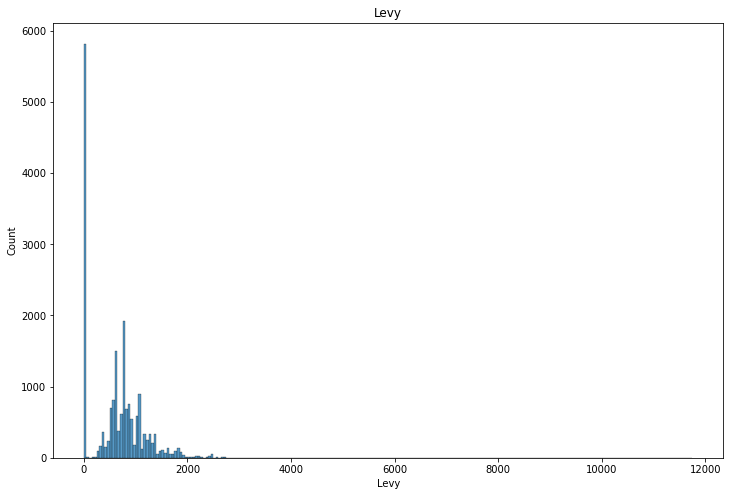

In [ ]:
plt.figure(figsize=(12, 8))

sns.histplot(data=df, x="Levy", binwidth=50)
plt.title('Levy')


There are a lot of 0 values 

In [ ]:
df["Levy"].value_counts()

0       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [ ]:
min_levy = df["Levy"].min()
print("Minimum value of the Levy column: {}".format(min_levy))

Minimum value of the Levy column: 0


In [ ]:
max_levy = df["Levy"].max()
print("Maximum value of the Levy column: {}".format(max_levy))

Maximum value of the Levy column: 11714


It is more likely that this feature has **outliers** on both the positive and negative sides since maximum and minimum values are away from the mean, mode and median. 

In [ ]:
std_levy = df["Levy"].std()
print("Standart deviation of the Levy column: {}".format(std_levy))

Standart deviation of the Levy column: 567.7216882750445


High standart deviation means that data widely scattered around the mean.

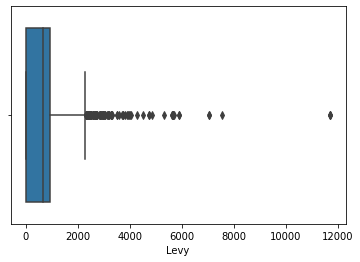

In [ ]:
sns.boxplot(x=df["Levy"])

We can clearly see from the boxplot that there are outliers in "Levy" column. 

In [ ]:
df["Levy"].describe()

count    19237.000000
mean       632.528669
std        567.721688
min          0.000000
25%          0.000000
50%        642.000000
75%        917.000000
max      11714.000000
Name: Levy, dtype: float64

We can also observe the number of values(count), mean, standart deviation, minimum and maximum values, median(second quartile) as well as first and third quartile of the Levy column by using the  `describe()` function.

#### 1.4.2 Analyze for Qualitative Variable

We will calulate some descriptive stats for the **Category** column. 

Checking the unique values in the Category column through `unique()` function. 

In [ ]:
df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

Checking the number of unique values in the Category column through `nunique()` function.

In [ ]:
df['Category'].nunique()

11

There are 11 categories.

One way to summarize a categorical variable is to compute the **frequencies** of the categories. We will use `value_counts()` function of Pandas to do that.

In [ ]:
df['Category'].value_counts()

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

We can visualize that by plotting a countplot from Seaborn library. 

Text(0.5, 1.0, 'Frequency of Categories')

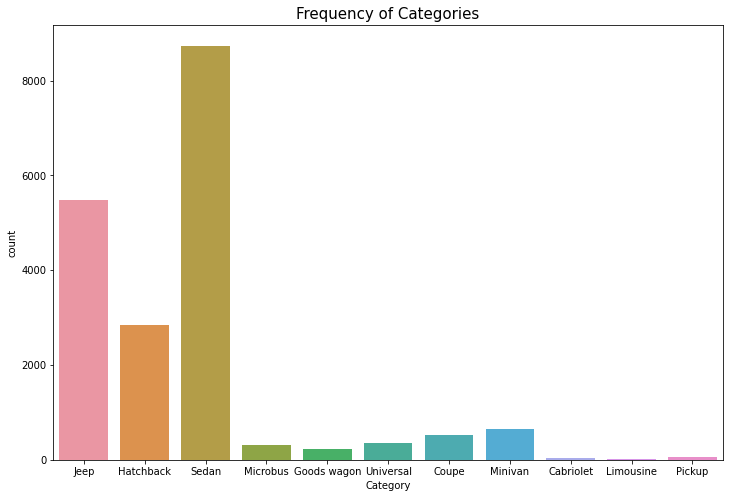

In [ ]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Category', data=df)
plt.title('Frequency of Categories', fontsize=15)

Top 3 most frequent categories are 'Sedan', 'Jeep' and 'Hatchback'

Since the most frequent value is 'Sedan', the **mode** of that column is 'Sedan'. We can calculate that through `mode()` function as well. 

In [ ]:
df['Category'].mode()

0    Sedan
dtype: object

### 1.5 Outliers

If our training data has outliers, detecting the pattern will be harder for our machine learning model and our model is less likely to perform well during the training (Aurélien Géron, 2019, p.27). <br/>

Also, outliers can mislead us while doing inferention after the application of some statistical concepts. 
Therefore, detecting outliers in data science projects is important in data preparation step. 

Firstly, we will define a function that calculates the number of outliers for the given column. Column name is represented by X parameter.  <br/>

Within my custom function which is called "sum_outliers", I will calculate the **first and third quartile(Q1 and Q3)** by using NumPy's `np.quartile()` function, as well as the **interquartile range(IQR)** (Q3 - Q1). Any value that is greater than Q3 + 1.5 IQR or less than Q1 - 1.5 IQR is considered as an outlier. 

Then, the function will return the number of outliers for a given column. <br/>

In accordance with the requirements of the project, we will handle only the **Levy** column. 

In [ ]:
def sum_outliers(X):
    """Outliers are calculated according to the matplotlib.pyplot's standards."""
    IQR = np.quantile(X, q=0.75) - np.quantile(X, q=0.25)
    upper_whisker = np.quantile(X, q=0.75) + (IQR * 1.5)
    lower_whisker = np.quantile(X, q=0.25) - (IQR * 1.5)
    return (X > upper_whisker).sum() + (X < lower_whisker).sum()

In [ ]:
column_names= ['Levy']

for i in column_names:
    if sum_outliers(df[f"{i}"])>0:
      print('Number of outliers in {} column: {}'.format(i ,sum_outliers(df[f"{i}"])))


Number of outliers in Levy column: 161


We can use 3 approaches to minimize the number of outliers: 

> **Log Transformation**: Calculating the natural logarithm of values so that values get close to other values in the dataset.  <br/>

> **Winsorization**: This function is applied to reduce the effect of possibly spurious outliers by limiting the extreme values. It changes the outlier value so that it is close to other values in the set (Dixon, 1960, pp.385–391). 

> **Root Square Transformation**: Calculating the root square of values so that values get close to other values in the dataset.


#### 1.5.1 Log Transformation

I will apply the log transformation by using NumPy's `log()` function and check the number of outliers in our dataset. Firstly, I will generate a custom function to calculate the number of outliers by applying log transformation.

In [ ]:
def sum_log_outliers(X):
    """Outliers are calculated according to the matplotlib.pyplot's standards."""
    X= np.log(X) #log transformation of the columns
    IQR = np.quantile(X, q=0.75) - np.quantile(X, q=0.25)
    upper_whisker = np.quantile(X, q=0.75) + (IQR * 1.5)
    lower_whisker = np.quantile(X, q=0.25) - (IQR * 1.5)
    return (X > upper_whisker).sum() + (X < lower_whisker).sum()

In [ ]:
column_names= ['Levy']

for i in column_names:
    if sum_outliers(df[f"{i}"])>0:
      print('Number of outliers in {} column: {}'.format(i ,sum_log_outliers(df[f"{i}"])))


Number of outliers in Levy column: 0


As you see above, we have **no outliers** after applying the log transformation. Before the log transformation, this number was 161. <br/> 


#### 1.5.2 Winsorization

I will use `winsorize()` function from `scipy.stats.mstats` module. This function returns a Winsorized version of the input (docs.scipy.org, n.d.). <br/>

Winsorizing can be applied one-way or two-way. In one-way winsorization, we constrain either the lowest end or the highest end of the value distribution. In both directions, we constrain both the lowest end and the highest end. In winsorization, the idea is to set the values of the endpoints to a certain percentage value.

I will generate a custom function to calculate the number of outliers by applying winsorization. I will winsorize %10 from both the lowest and the highest sides of data.

In [ ]:
def sum_winsorize_outliers(X):
    """Outliers are calculated according to the matplotlib.pyplot's standards."""
    X= winsorize(X, (0.10, 0.10)) #winsorization of the given column
    IQR = np.quantile(X, q=0.75) - np.quantile(X, q=0.25)
    upper_whisker = np.quantile(X, q=0.75) + (IQR * 1.5)
    lower_whisker = np.quantile(X, q=0.25) - (IQR * 1.5)
    return (X > upper_whisker).sum() + (X < lower_whisker).sum()

In [ ]:
column_names= ['Levy']

for i in column_names:
    if sum_outliers(df[f"{i}"])>0:
      print('Number of outliers in {} column: {}'.format(i ,sum_winsorize_outliers(df[f"{i}"])))
      

Number of outliers in Levy column: 0


As you see above, we have **no outliers** after applying the winsorization. Before the winsorization, this number was 161. 

#### 1.5.3 Root Square Transformation

I will apply the root square transformation by using NumPy's `sqrt()` function and check the number of outliers in our dataset (numpy.org, n.d.). <br/>

Firstly, I will generate a custom function to calculate the number of outliers by applying root square transformation.

In [ ]:
def sum_sqrt_outliers(X):
    """Outliers are calculated according to the matplotlib.pyplot's standards."""
    X= np.sqrt(X) #square-root of the given column
    IQR = np.quantile(X, q=0.75) - np.quantile(X, q=0.25)
    upper_whisker = np.quantile(X, q=0.75) + (IQR * 1.5)
    lower_whisker = np.quantile(X, q=0.25) - (IQR * 1.5)
    return (X > upper_whisker).sum() + (X < lower_whisker).sum()

In [ ]:
column_names= ['Levy']

for i in column_names:
    if sum_outliers(df[f"{i}"])>0:
      print('Number of outliers in {} column: {}'.format(i ,sum_sqrt_outliers(df[f"{i}"])))

Number of outliers in Levy column: 8


As you see above, we have **8 outliers** after applying the root square transformation. Before the root square transformation, this number was 161. <br/>
We can say that the root square transformation hade significant impact on the number of outliers. However, it could not get rid of all the outliers while other methods could. 

We got the best results with log tranformation and winsorization. We will apply log tansformation and continue to our analysis with log transformed data. <br/>

The reason for choosing the log transformation over the winsorization is we may have misleading information in the winsorization method since it suppresses the outliers. However, we apply the log transformation over all data points, so, we approach equally to each data point. 


In [ ]:
#We will keep both Leavy and log transformed Levy column
df["Levy_log"]= np.log(df["Levy"]) #log transformation of the Levy column

## 2- Hypotesis Testing

**We assume that the average price of 50 Honda brand cars is more expensive than the average of 50 Chevrolet brand cars.**

H0: u => avg(Cherolet) price <br>
H1: u < avg(Chevrolet) price

**Extracting sample (50 random Honda car.)**

In [ ]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine volume,Mileage,Cylinders,Gear_box_type,Drive wheels,Doors,Wheel,Color,Airbags,Levy_log
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,7.243513
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,6.925595
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,-inf
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,6.759255
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,6.100319


### 2.1 Extraction of Honda sample

In [ ]:
df_h= df[df['Manufacturer']=='HONDA']
df_h= df_h[['Manufacturer', 'Price']]
df_h.head()

,Manufacturer,Price
2,HONDA,8467
4,HONDA,11726
37,HONDA,7527
50,HONDA,34889
82,HONDA,21953


In [ ]:
df_h.count()

Manufacturer    977
Price           977
dtype: int64

Choosing randomly 50 cars for a  sample from df_h (honda data)

In [ ]:
df_h= df_h.sample(n = 50)
df_h.count()

Manufacturer    50
Price           50
dtype: int64

We will visualise the price of Honda sample in order to see distribution and outliers

Text(0.5, 1.0, 'Honda Sample')

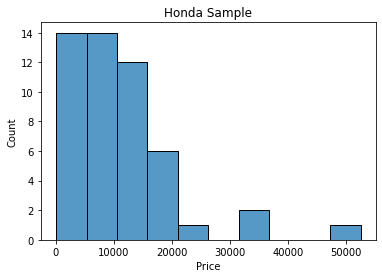

In [ ]:
sns.histplot(data = df_h, x = 'Price')
plt.title('Honda Sample')

We will plot a boxplot to see the outliers more clearly. 

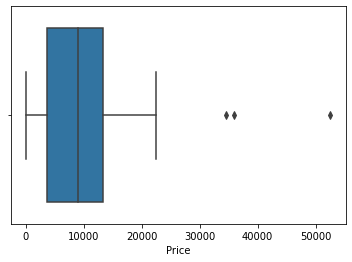

In [ ]:
sns.boxplot(df_h['Price'])

We will check the descriptive stats of the "Price" column.

In [ ]:
df_h.describe()

,Price
count,50.000000
mean,10495.120000
std,10037.064626
min,30.000000
25%,3606.500000
50%,9054.000000
75%,13289.000000
max,52520.000000


As we can see the price of honda brand has a small number of outliers. The distribution of price is slightly left skewed as midean>mean standard deviation is high. We will apply techniques to remove outliers and normalize the data.
 
**Removing outliers**
 
We will be using `np.sqrt()` function to take the root square of our samples. We do that to remove the outliers and make the data close to normal distribution since z-test requires normal distribution.

In [ ]:
df_h['Price']= np.sqrt(df_h["Price"])
df_h.head()

,Manufacturer,Price
16076,HONDA,45.144213
5396,HONDA,130.230565
14404,HONDA,107.721864
7798,HONDA,131.335448
9979,HONDA,107.721864


Descriptive stats of transformed data: 

In [ ]:
df_h['Price'].describe()

count     50.000000
mean      88.948449
std       51.342125
min        5.477226
25%       59.709461
50%       95.134318
75%      115.277552
max      229.172424
Name: Price, dtype: float64

As seen above, the mean is close to median anymore.

Checking the skewness of transformed data

In [ ]:
df_h.Price.skew()

0.0722626082843336

We can say that data is pretty close to normal distribution since the result of `skew()` is around 0, as well as the mean, is close to median. 

### 2.2 Extraction of Chevrolet sample

Extracting data of the **CHEVROLET** brand cars to perform the hypotheses. I will create a dataframe that will consist of the brand and the price of the model

In [ ]:
df_ch= df[df['Manufacturer']=='CHEVROLET']
df_ch= df_ch[['Manufacturer', 'Price']]
df_ch.head()

,Manufacturer,Price
1,CHEVROLET,16621
59,CHEVROLET,23521
71,CHEVROLET,15800
88,CHEVROLET,6247
89,CHEVROLET,16289


In [ ]:
df_ch.count()

Manufacturer    1069
Price           1069
dtype: int64

We will choose a sample of 50 **CHEVROLET** cars from the datframe df_ch

In [ ]:
df_ch= df_ch.sample(n = 50)
df_ch.count()

Manufacturer    50
Price           50
dtype: int64

Descriptive stats of Price column

In [ ]:
df_ch.describe()

,Price
count,50.000000
mean,15239.100000
std,10105.451459
min,188.000000
25%,7288.250000
50%,13720.500000
75%,20611.750000
max,50560.000000


We will visualize the price of Chevrolet to see its distribution

Text(0.5, 1.0, 'Chev Sample')

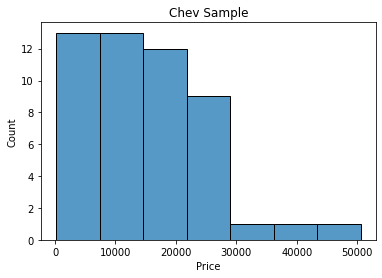

In [ ]:
sns.histplot(data = df_ch, x = 'Price')
plt.title('Chev Sample')

The graph does not follow a normal distribution as we can see it is slightly right-skewed.
 
We will apply a boxplot as well to see if we have outliers.


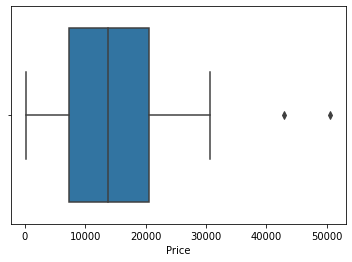

In [ ]:
sns.boxplot(df_ch['Price'])

We have a few outliers that could be fixed by applying the root square technique. 
 
We will use .skew() function to show what skew the features has 

In [ ]:
df_ch['Price'].skew()

1.251394502767112

We can say that the data is pretty close to normal distribution. However, we still keep working on it and we will see the changes after the root square application 

**Removing outliers**

We will be using `np.sqrt()` function to take the root square of our samples. We do that to remove the outliers and make the data close to normal distribution since z-test requires normal distribution. 

In [ ]:
df_ch['Price']= np.sqrt(df_ch['Price'])

Checking the skewness of transformed data

In [ ]:
df_ch['Price'].skew()

0.17118148323959562

Descriptive stats of transformed data:

In [ ]:
df_ch['Price'].describe()

count     50.000000
mean     116.620748
std       40.891857
min       13.711309
25%       85.367870
50%      117.122553
75%      143.562693
max      224.855509
Name: Price, dtype: float64

Visualising the distribution

Text(0.5, 1.0, 'Chev Sample')

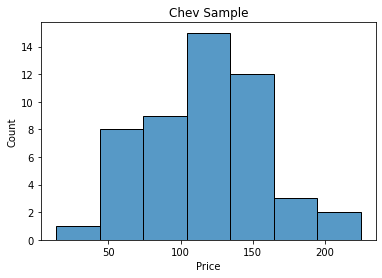

In [ ]:
sns.histplot(data = df_ch, x = 'Price')
plt.title('Chev Sample')

We can say that data is pretty close to normal distribution since the result of skew() is around 0, as well as the mean, is close to median. Also, the plot above shows that the data is close to normal distribution. 

### 2.3 Z-test 
As we know z-test could be applied when 
 - Sample size is larger(n > 30) 
 - Variables should have an approximately normally distributed
 - Standard deviation should be known
 - Observations are randomly drawn from the population
 - Dependent variable represented as continuous 


In [ ]:
from google.colab import files
from IPython.display import Image

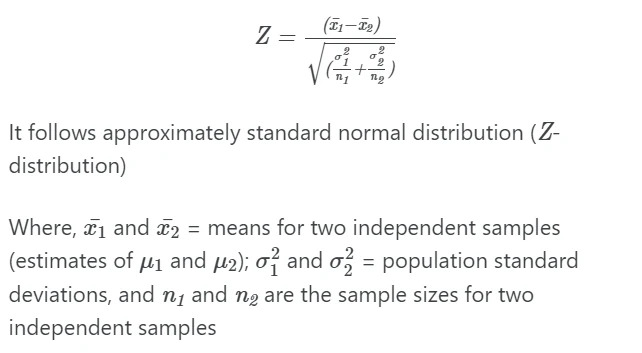

In [ ]:
Image("/content/drive/MyDrive/Colab Notebooks/CCT Classes/Stats_CA/two_samp_z_form.jpg", width=600)


We will add a stats library to perform the z-test


In [ ]:
import scipy.stats as stats
from scipy.stats import binom_test
import math 
from statsmodels.stats.weightstats import ztest


As we are working with prices of 2 different samples it will be more convenient for us to save them in variables x and y

- x - Honada price
- y - Chevrolet price

In [ ]:
x = df_h["Price"]
y = df_ch["Price"]

We will perforfom statistical measure to see mean and standard deviation of the variables. 

We will use mean() and std() function for it

In [ ]:
x.mean()

88.94844853843783

In [ ]:
y.mean()

116.62074831339496

In [ ]:
x.std()

51.34212479210656

In [ ]:
y.std()

40.89185666678536

We do not have normal distribution which is normal as we working with random samples. We minimize the skewness of the variables. In both cases is close to 0 so we can perform the testing.


**Performance of the test**

**We will perform z-test** in order to proof if the avarage 

price of Honda equal or bigger than avarage price of Chevrolete. 

We need to import ztest form stats and set propability_value. In this case the value will be = 0.05. It is defult value is suitable for us as we are not working with sensiteve data. 

In [ ]:
from statsmodels.stats import weightstats as stests
ztest ,propability_value = stests.ztest(x, y, value=0)
print(ztest)
print(float(propability_value))
if propability_value<0.05:
  print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
  print("Null hyphothesis accepted , Alternative hyphothesis rejected")

-2.9811543258468025
0.0028716403897541274
Null hyphothesis rejected , Alternative hyphothesis accepted


According to the performance we can say that H0 is rejected. <br/>
Mean price of Honada brand is not more expensive than Chevrolet brand with  95% level of confidence. Alternative hypothesis says that price of the Chevrolet brand is more expencive than Honda price. We have negative score for z-test what is also normal. Negative score indicates that its z score below the mean.



## 3-Correlation

This is statistical technique which is commonly used to know if variables have relation between each other. In bussines context, it can be used to analyse if any varaible influence particular outcome metric.

It is also important to understand that correlation is not causation. If varaibles have correlation, that does not mean that one can cause anothere one. To prove it, deep analysis could be required. 

We will use "spearman" correlation as we work with numerical features and categorical values.


In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine volume,Mileage,Cylinders,Gear_box_type,Drive wheels,Doors,Wheel,Color,Airbags,Levy_log
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,7.243513
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,6.925595
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,-inf
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,6.759255
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,6.100319


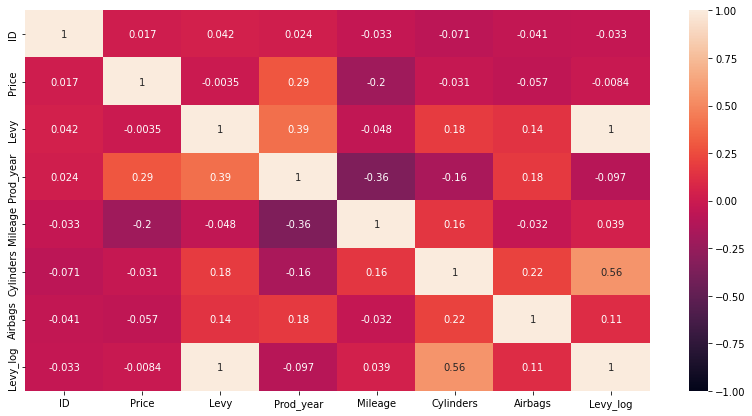

In [ ]:
plt.figure(figsize = (14,7))
heatmap = sns.heatmap(df.corr("spearman"), vmin=-1, vmax=1, annot=True)

After applying the heatmap we can see that the variables do not have strong correlation between each other. However, there is high correlation between the variables "Levy_log" and "Cylinders"


We already familiar with the variable Levy. So, we will have a look the variable "Cylindric". 

We use "Levy_log" as we have this variable without outliers.

In [ ]:
df["Cylinders"]

0        6.0
1        6.0
2        4.0
3        4.0
4        4.0
        ... 
19232    4.0
19233    4.0
19234    4.0
19235    4.0
19236    4.0
Name: Cylinders, Length: 19237, dtype: float64

In [ ]:
df["Cylinders"].value_counts()

4.0     14367
6.0      3462
8.0       991
5.0       169
3.0       107
2.0        42
1.0        38
12.0       38
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: Cylinders, dtype: int64

We can see that "Cylindric" variable has categories 4, 5, 9 and so on. It is number of cylinders in the car.

The next step will be displaying the corelation between varaibles. 
We will see what correlation they have.

Text(0, 0.5, 'Cylinders')

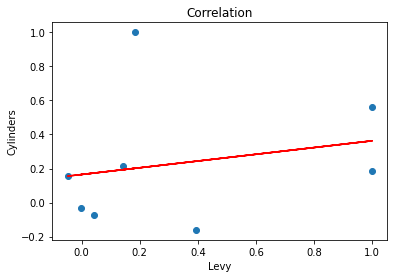

In [ ]:
a = df.corr(method="spearman")["Levy_log"]
b = df.corr(method="spearman")["Cylinders"]
plt.title("Correlation")

plt.scatter(a,b)
# fits the best fitting line to the data
plt.plot(a,
         np.poly1d(np.polyfit(a, b, 1))
         (a), color='red')
 
# Labelling axes
plt.xlabel(a.name)
plt.ylabel(b.name)

The graph shows that the variables have positive correlaton. It means that one variable depend to other one since when the number of cylinders raised the levy is raised as well.

To come back to causation. We can not say that 100% one variable can caused another. However, in the particular case we can say that numbers of cylinders can effect the levy. If a car has more cylinders it can increse tax rate payed for particular type of car. If there is more cylinders in a car it becomes more powerfull and it produces more emission. The tax usually charged according to the level of emmision produced by the car. Every country has their own law according to it. 

We can conclude that variable "Levy_log" can be caused by the variale "Cylindric"

## 4- Linear Regression

In [ ]:
#importing necessary libraries
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error 
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

We will build regression models to predict our target column (Price). We determined following algorithms to build regression model. <br/>
- Linear Regression
- KNN
- Decision Trees
- Random Forest
- Support Vector Machines

Before building our model, we need to convert categorical variables to numeric values since categorical variables are strings. One of the most convenient ways to convert categorical variables to numeric ones is called **one hot encoding**. In one-hot encoding, we create a separate binary variable that takes 0 or 1 for each of the categorical variable's unique values. The `get_dummies()` function in Pandas does this for us.

We drop log transformed column before applying ML model because log transformed version decreased the performance of model.

In [ ]:
#dropping log transformed column before applying ML model
df= df.drop('Levy_log', axis=1)

In [ ]:
df = pd.get_dummies(df, columns=["Manufacturer", "Model", "Category", 'Leather_interior', 'Fuel_type', 'Engine volume', 'Gear_box_type', 'Drive wheels', 'Doors', 'Wheel', 'Color'], drop_first=True)

We applied one hot encoding. 

Defining the target variable (Price) and features for our regression models. 

In [ ]:
X = df.drop('Price', axis=1) #Features
y = df['Price'] #Target

We defined 2 user defined function to automatize the process of buildng models and making predictions. 

In [ ]:
#function for creating the model and making prediction
def fit_predict_score(Model, X_train, y_train, X_test, y_test):
    """Fit the model of your choice, predict for test data, and returns classification metrics."""
    model = Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

#function for comparing the models
def model_comparison(X, y):
    """Creates a DataFrame comparing Linear Regression, K-Nearest Neighbors, Decision Tree,
    Random Forest,  Support Vector Machines, XGBoost."""
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    lr_r2 = fit_predict_score(LinearRegression(), X_train, y_train, X_test, y_test)
    knn_r2 = fit_predict_score(KNeighborsRegressor(), X_train, y_train, X_test, y_test)
    dtr_r2 = fit_predict_score(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)
    rfr_r2 = fit_predict_score(RandomForestRegressor(), X_train, y_train, X_test, y_test)
    svr_r2 = fit_predict_score(SVR(), X_train, y_train, X_test, y_test)
    

    models = ['Linear Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machines']
    r2_score= [lr_r2, knn_r2, dtr_r2, rfr_r2, svr_r2]
    
    model_comparison = pd.DataFrame(data=[models, r2_score]).T.rename({0: 'Model', 1: 'R2 Score'}, axis=1)
    
    return model_comparison

In [ ]:
print("Model Results")
display(model_comparison(X, y))

Model Results


,Model,R2 Score
0,Linear Regression,-7.471073
1,K-Nearest Neighbors,-35.013219
2,Decision Tree,0.572296
3,Random Forest,0.679806
4,Support Vector Machines,-0.044579


We calculated R2 scores of each model. As seen from the output, best results we got are the results coming from "Decision Tree" and "Random Forest" models. 

# References

- Angel Das. 8 November.  Z Test Statistics Formula & Python - Implementation. [online] Available at: https://towardsdatascience.com/z-test-statistics-formula-python-implementation-3755d67ba0e7 [Accesed 07 December 2022]. </br>

- Aurélien Géron (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 2nd ed. ‘O’Reilly Media, Inc.’, p.27. </br>
 
- David McQuaid (2021). Tutorial 6 ARIMA Model (a) [PowerPoint slides]. Time Series Analysis course at CCT College [Accessed 17 April 2023]

- David Nettleton(2014)., Selection of Variables and Factor Derivation
[online]. Available at: https://www.sciencedirect.com/topics/computer-science/pearson-correlation [Acceced 10 December 2022]. </br>

- docs.scipy.org. (n.d.). scipy.stats.mstats.winsorize — SciPy v1.9.3 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html [Accessed 6 Nov. 2022]. </br> 

- numpy.org. (n.d.). numpy.sqrt — NumPy v1.23 Manual. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html [Accessed 6 Nov. 2022] </br>
 
- Seema Singh(2018 )Why correlation does not imply causation? [onlne] Available at https://medium.com/@seema.singh/why-correlation-does-not-imply-causation-5b99790df07e. [Acceced 11 December 2022]. </br>
-ZACH, (2021)., How to Perform One Sample & Two Sample Z-Tests in Python.  [online] Available at: https://www.statology.org/z-test-python/ [Accesed 06 December 2022]. </br>